### Load library and import data

In [1]:
import pandas as pd
pd.options.display.max_rows = None
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df1=pd.read_csv("bank_marketing_part1_Data.csv")

### Inspect the data

In [3]:
df1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
df1.shape

(210, 7)

The dataset has 210 rows and 7 columns (6 independent variables and  1 dependent)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


All variables are in float64 data type

In [6]:
e = df1.describe(include="all")
e

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


### Checking for Missing values

In [7]:
# Are there any missing values ?

df1.isna().sum()



spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

### Checking for Duplicates

In [8]:
# Are there any duplicates ?
dups = df1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df1[dups]

Number of duplicate rows = 0


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping


There are no Duplicates

### Checking for Outliers

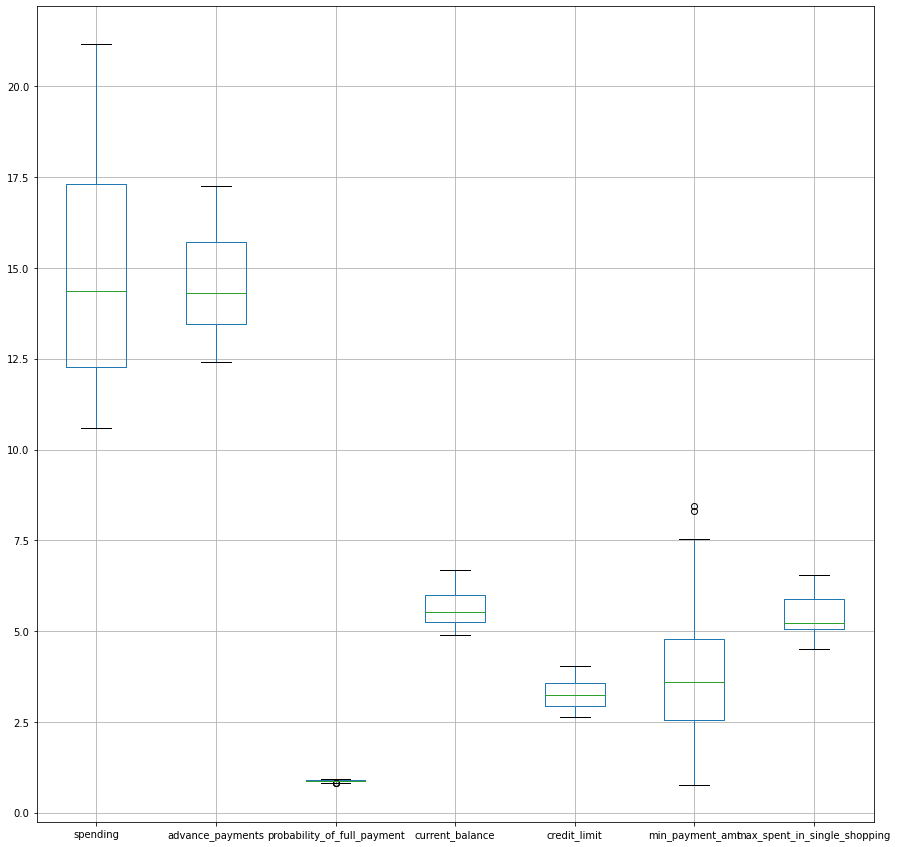

In [9]:
plt.figure(figsize=(15,15))
df1.boxplot(vert=1)

Very small number of outliers are present, which is also not significant as it will not affect much

### Checking pairwise distribution of the continuous variables

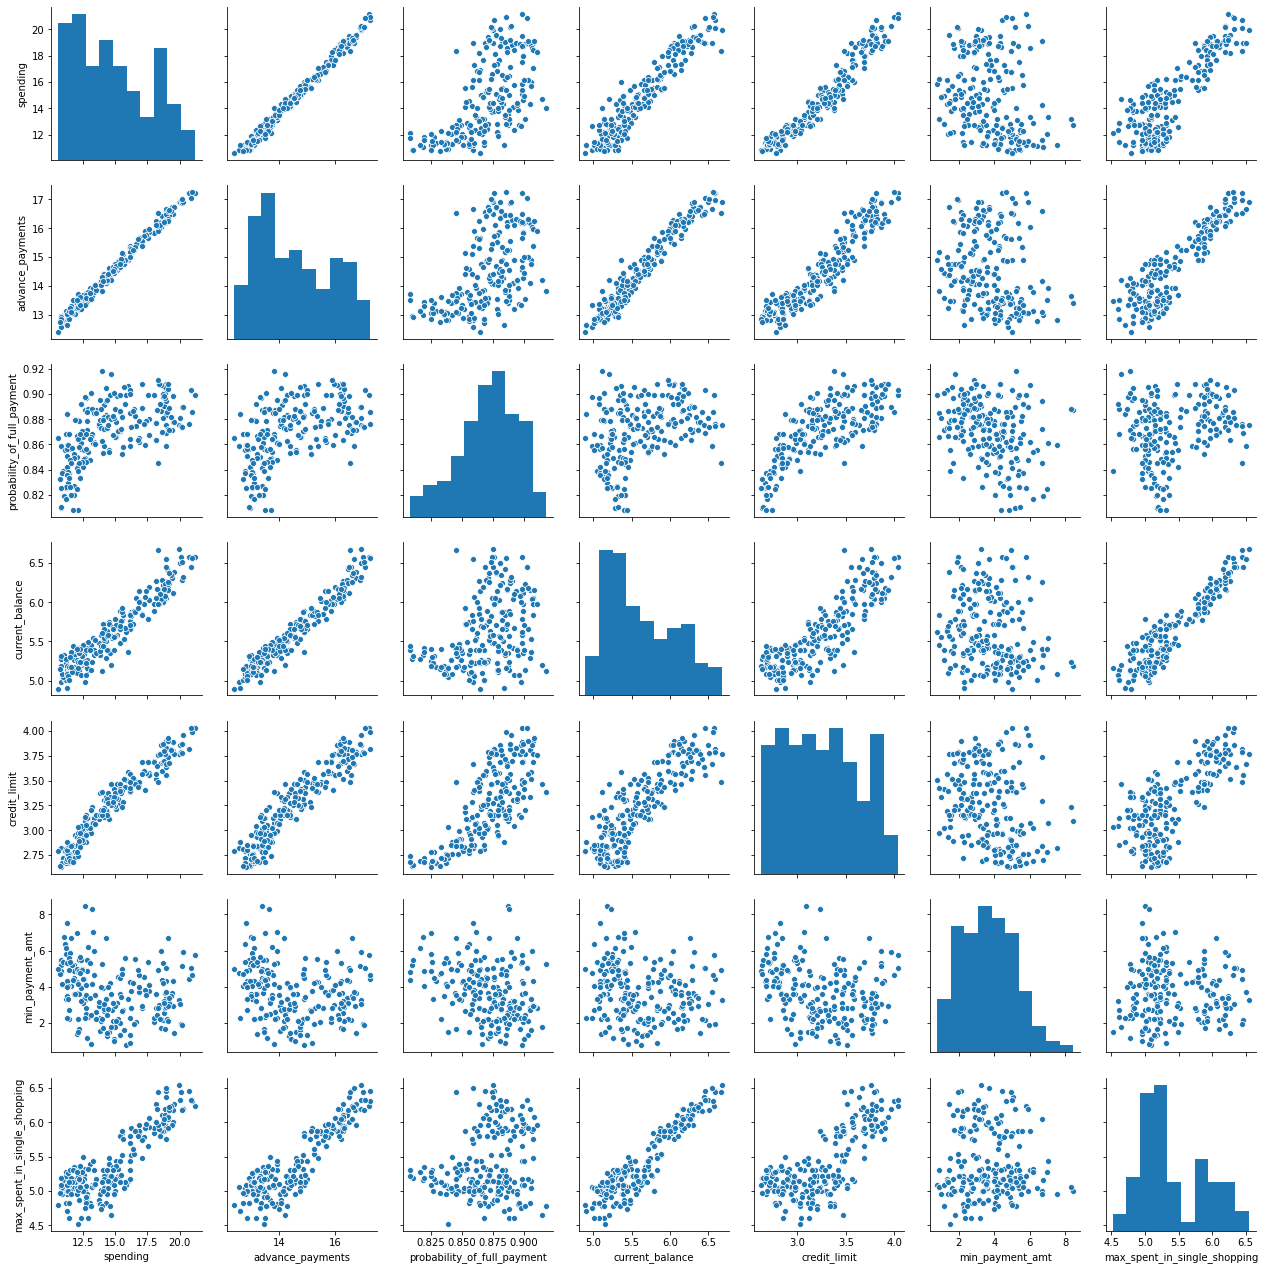

In [10]:
import seaborn as sns
sns.pairplot(df1)

### Checking for Correlations

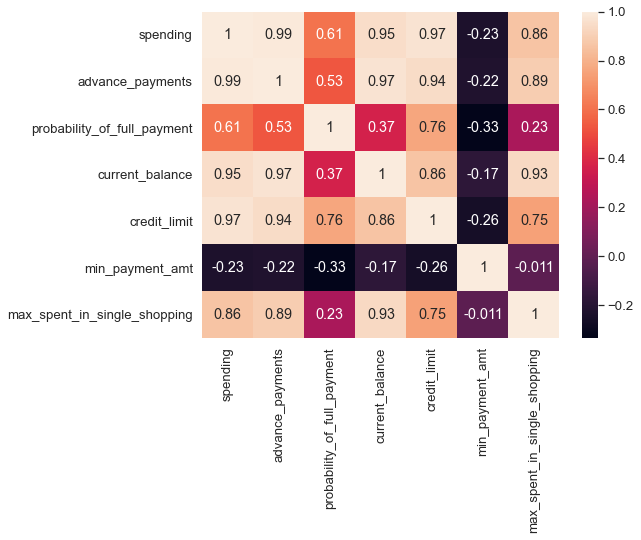

In [11]:
# construct heatmap with only continuous variables
plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)
sns.heatmap(df1.corr(), annot=True)

There is a high postive correlation among many variables such as 'spending', 'advance_payments', 'current_balance' and 'credit_limit'.

In [12]:
link_method = linkage(df1.iloc[:,:], method = 'average')

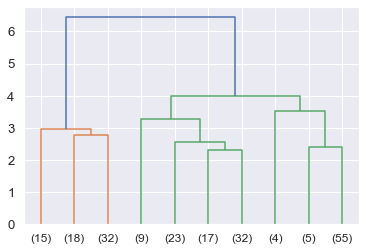

In [13]:
dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
X = StandardScaler()

In [16]:
scaled_df1 = X.fit_transform(df1)

In [17]:
scaled_df1

array([[ 1.75435461,  1.81196782,  0.17822987, ...,  1.33857863,
        -0.29880602,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.501773  , ...,  0.85823561,
        -0.24280501, -0.53858174],
       [ 1.41330028,  1.42819249,  0.50487353, ...,  1.317348  ,
        -0.22147129,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -0.15287318,
        -1.3221578 , -0.83023461],
       [ 0.43836719,  0.33827054,  1.23027698, ...,  0.60081421,
        -0.95348449,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.07325831,
        -0.70681338,  0.96047321]])

In [18]:
wss =[]

In [19]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df1)
    wss.append(KM.inertia_)

In [20]:
wss

[1469.9999999999998,
 659.171754487041,
 430.6589731513006,
 371.30172127754196,
 326.22891682972653,
 290.0504842894783,
 262.5142108001491,
 240.63875523777338,
 220.2831772667954,
 205.57441387210278]

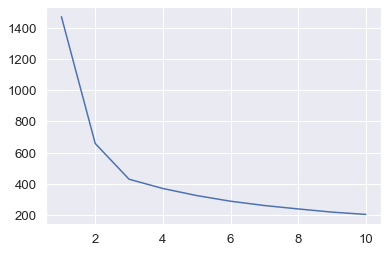

In [21]:
plt.plot(range(1,11), wss)

In [22]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [23]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df1)
labels = k_means.labels_

In [24]:
silhouette_score(scaled_df1,labels)

0.4007270552751299

In [25]:
sil_width = silhouette_samples(scaled_df1,labels)

In [26]:
df1["sil_width"] = sil_width
df1.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,0.573699
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,0.366386
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,0.637784
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0.512458
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,0.362276


In [27]:
df1.sort_values(by=['sil_width'], ascending=False,)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,sil_width
101,19.31,16.59,0.8815,6.341,3.810,3.4770,6.238,0.639285
2,18.95,16.42,0.8829,6.248,3.755,3.3680,6.148,0.637784
68,19.15,16.45,0.8890,6.245,3.815,3.0840,6.185,0.632052
39,19.51,16.71,0.8780,6.366,3.801,2.9620,6.185,0.622415
54,18.81,16.29,0.8906,6.272,3.693,3.2370,6.053,0.619671
198,19.18,16.63,0.8717,6.369,3.681,3.3570,6.229,0.613978
43,20.03,16.90,0.8811,6.493,3.857,3.0630,6.320,0.610989
53,19.38,16.72,0.8716,6.303,3.791,3.6780,5.965,0.599266
196,18.76,16.20,0.8984,6.172,3.796,3.1200,6.053,0.597826
103,18.89,16.23,0.9008,6.227,3.769,3.6390,5.966,0.590442


In [28]:
silhouette_samples(scaled_df1,labels).mean()

0.4007270552751299

# 2

## CART method

In [191]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [192]:
df2 = pd.read_csv("insurance_part2_data.csv")

In [193]:
df2.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [194]:
df2.shape

(3000, 10)

In [195]:
df2.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000,NaN,NaN,NaN,38.091,10.4635,8,32,36,42,84
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000,NaN,NaN,NaN,14.5292,25.4815,0,0,4.63,17.235,210.21
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000,NaN,NaN,NaN,70.0013,134.053,-1,11,26.5,63,4580
Sales,3000,NaN,NaN,NaN,60.2499,70.734,0,20,33,69,539
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Geting unique counts of all object Variables

In [196]:
for column in df2[['Agency_Code', 'Claimed', 'Channel', 'Type', 'Product Name', 'Destination' ]]:
    print(column.upper(),': ',df2[column].nunique())
    print(df2[column].value_counts().sort_values())
    print('\n')

AGENCY_CODE :  4
JZI     239
CWT     472
C2B     924
EPX    1365
Name: Agency_Code, dtype: int64


CLAIMED :  2
Yes     924
No     2076
Name: Claimed, dtype: int64


CHANNEL :  2
Offline      46
Online     2954
Name: Channel, dtype: int64


TYPE :  2
Airlines         1163
Travel Agency    1837
Name: Type, dtype: int64


PRODUCT NAME :  5
Gold Plan             109
Silver Plan           427
Bronze Plan           650
Cancellation Plan     678
Customised Plan      1136
Name: Product Name, dtype: int64


DESTINATION :  3
EUROPE       215
Americas     320
ASIA        2465
Name: Destination, dtype: int64




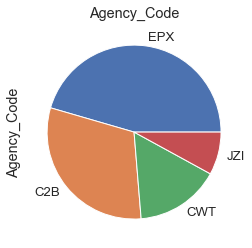

In [197]:
pd.value_counts(df2['Agency_Code']).plot(kind="pie")
plt.title('Agency_Code', fontdict=None, loc='center',)
plt.show()

In [198]:
for feature in df2.columns: 
    if df2[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df2[feature].unique()))
        print(pd.Categorical(df2[feature].unique()).codes)
        df2[feature] = pd.Categorical(df2[feature]).codes



feature: Agency_Code
[C2B, EPX, CWT, JZI]
Categories (4, object): [C2B, CWT, EPX, JZI]
[0 2 1 3]


feature: Type
[Airlines, Travel Agency]
Categories (2, object): [Airlines, Travel Agency]
[0 1]


feature: Claimed
[No, Yes]
Categories (2, object): [No, Yes]
[0 1]


feature: Channel
[Online, Offline]
Categories (2, object): [Offline, Online]
[1 0]


feature: Product Name
[Customised Plan, Cancellation Plan, Bronze Plan, Silver Plan, Gold Plan]
Categories (5, object): [Bronze Plan, Cancellation Plan, Customised Plan, Gold Plan, Silver Plan]
[2 1 0 4 3]


feature: Destination
[ASIA, Americas, EUROPE]
Categories (3, object): [ASIA, Americas, EUROPE]
[0 1 2]


In [199]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [200]:
df2['Claimed'].value_counts(normalize = True)*100

0    69.2
1    30.8
Name: Claimed, dtype: float64

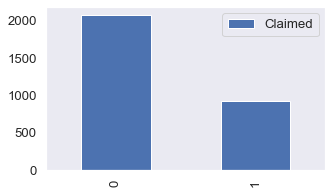

In [201]:
plt.figure(figsize=(5,3))
df2['Claimed'].value_counts().plot(kind='bar')
plt.legend()
plt.grid()
plt.show()

In [202]:
df2

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0
5,45,3,0,1,15.75,1,8,45.00,0,0
6,61,1,1,0,35.64,1,30,59.40,2,1
7,36,2,1,0,0.00,1,16,80.00,1,0
8,36,2,1,0,0.00,1,19,14.00,1,0
9,36,2,1,0,0.00,1,42,43.00,1,0


In [203]:
df2.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

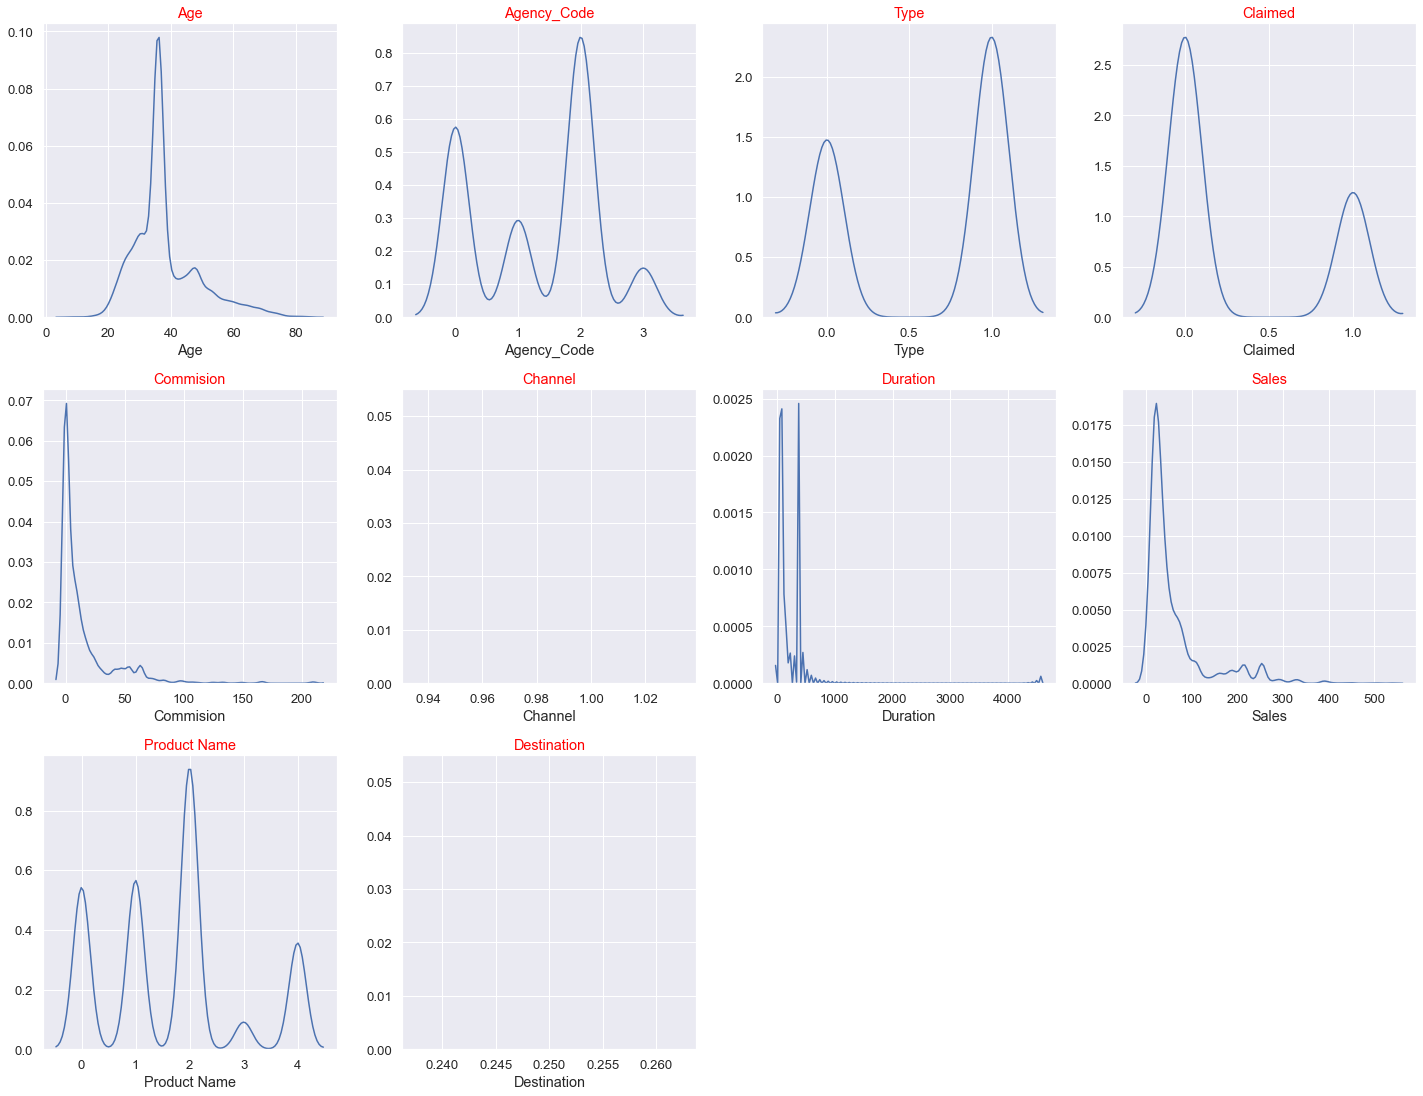

In [204]:
data_plot=df2
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,4,i+1)
    sns.distplot(data_plot[data_plot.columns[i]],hist=False)
    ax.set_title(data_plot.columns[i],color='Red')
plt.tight_layout()
plt.show()

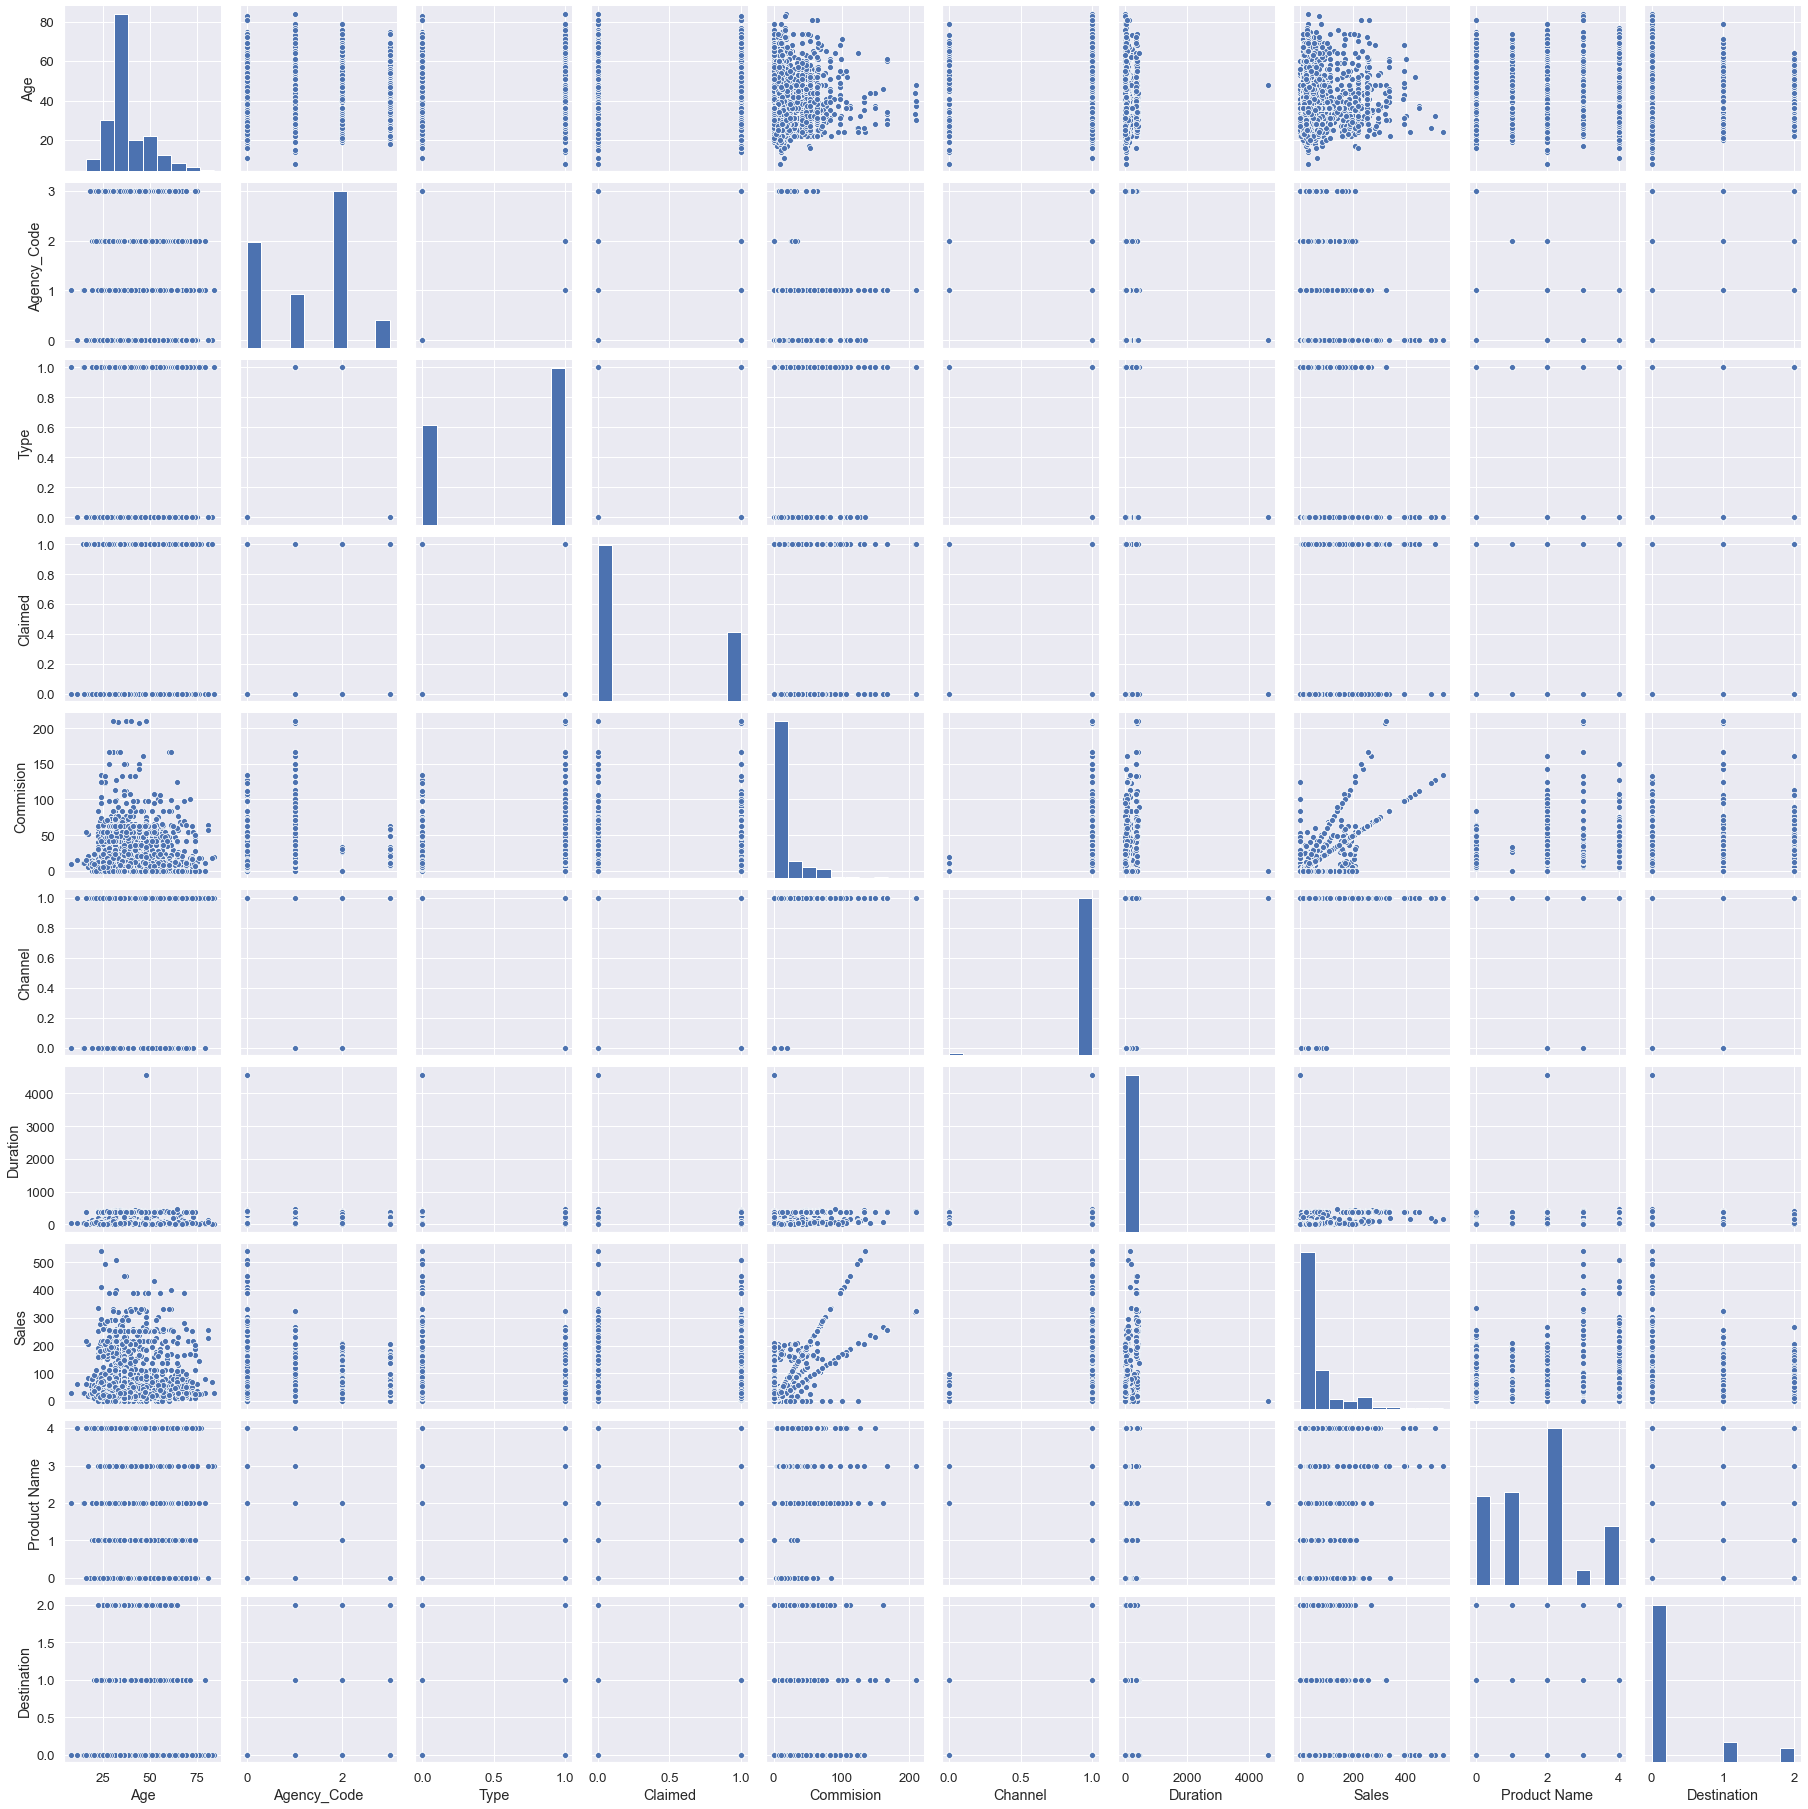

In [205]:
sns.pairplot(df2)

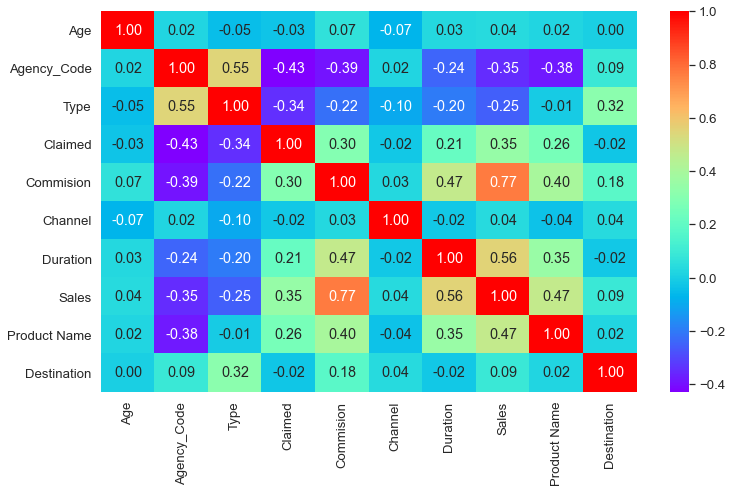

In [206]:
plt.figure(figsize=(12,7))
sns.heatmap(df2.corr(),annot=True,fmt='.2f',cmap='rainbow')
plt.show()

Overall the magnitude of correlations between the variables are very less and mostly they are negative

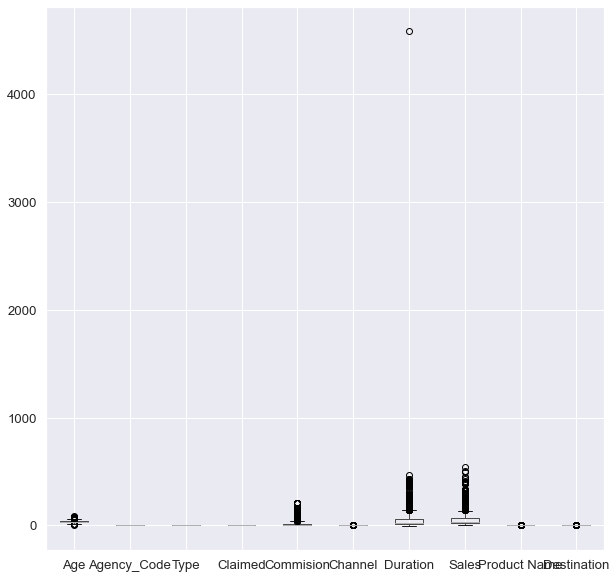

In [207]:
plt.figure(figsize=(10,5))
df2.boxplot(vert=1)

There are outliers in all the variables. Random Forest and ANN can handle the outliers. Hence, Outliers are not treated for now, we will keep the data as it is.

In [208]:
df2c = df2

In [209]:
X = df2c.drop("Claimed" , axis=1)

y = df2c.pop("Claimed")

In [210]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

# Decision Tree Classifier

In [211]:
dtree = DecisionTreeClassifier(random_state=1)

In [212]:
dtree.fit(X_train,train_labels)

DecisionTreeClassifier(random_state=1)

In [213]:
trainpredictions = dtree.predict(X_train)
testpredictions = dtree.predict(X_test)

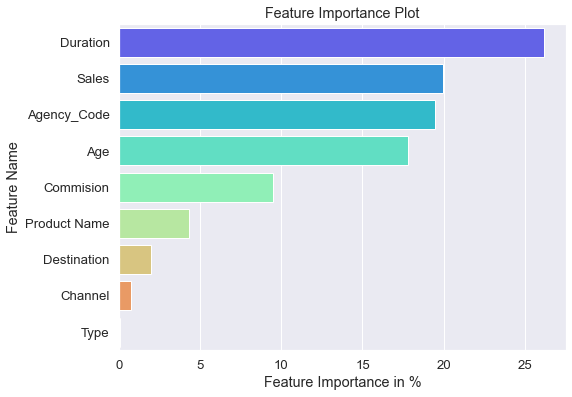

In [214]:
x=pd.DataFrame(dtree.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

In [215]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve

In [216]:
print(classification_report(train_labels,trainpredictions))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1471
           1       1.00      0.98      0.99       629

    accuracy                           0.99      2100
   macro avg       1.00      0.99      0.99      2100
weighted avg       0.99      0.99      0.99      2100



In [217]:
print(classification_report(test_labels,testpredictions))

              precision    recall  f1-score   support

           0       0.77      0.82      0.80       605
           1       0.58      0.50      0.54       295

    accuracy                           0.72       900
   macro avg       0.68      0.66      0.67       900
weighted avg       0.71      0.72      0.71       900



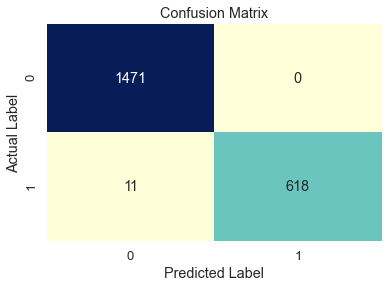

In [218]:
sns.heatmap(confusion_matrix(train_labels,trainpredictions),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

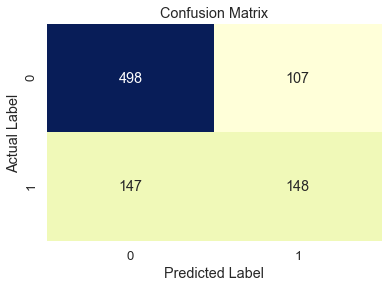

In [219]:
sns.heatmap(confusion_matrix(test_labels,testpredictions),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [220]:
print('Accuracy Score is',round(accuracy_score(test_labels, testpredictions),2)*100,'%')

Accuracy Score is 72.0 %


In [221]:
print('Area Under the Curve is',round(roc_auc_score(test_labels,dtree.predict_proba(X_test)[:,1]),2)*100,'%')

Area Under the Curve is 66.0 %


In [222]:
dt_fpr, dt_tpr,_=roc_curve(test_labels,dtree.predict_proba(X_test)[:,1])

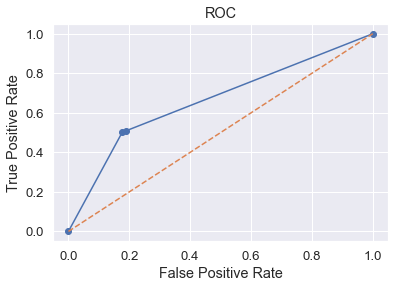

In [223]:
plt.plot(dt_fpr,dt_tpr, marker='o', label='Decision Tree')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [224]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 4, 5],
    'min_samples_leaf': [5, 10, 20],
    'min_samples_split': [25, 35, 45]
}

dt_model = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 5)

In [225]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [226]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [25, 35, 45]})

In [227]:
grid_search.best_params_

{'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 35}

In [228]:
best_grid = grid_search.best_estimator_

In [229]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [230]:
from sklearn.metrics import classification_report

In [231]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1471
           1       0.66      0.64      0.65       629

    accuracy                           0.79      2100
   macro avg       0.75      0.75      0.75      2100
weighted avg       0.79      0.79      0.79      2100



In [232]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.81      0.89      0.84       605
           1       0.71      0.57      0.63       295

    accuracy                           0.78       900
   macro avg       0.76      0.73      0.74       900
weighted avg       0.77      0.78      0.77       900



In [233]:
print('Accuracy Score is',round(accuracy_score(test_labels, ytest_predict),2)*100,'%')

Accuracy Score is 78.0 %


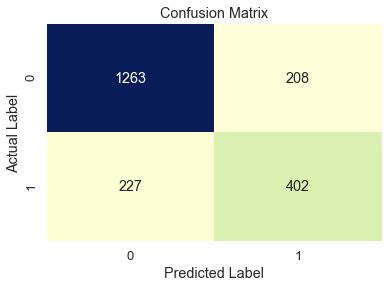

In [234]:
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

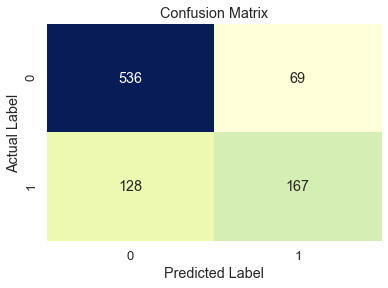

In [235]:
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [236]:
print('Area Under the Curve is',round(roc_auc_score(test_labels,dt_model.predict_proba(X_test)[:,1]),2)*100,'%')

Area Under the Curve is 66.0 %


# Clustering